Connecting Drive

In [391]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Project Goal:
### Task to predict whether person has ckd or notckd??

#### ckd-chronic kidney disease
#### notckd-->> not crornic kidney disease

Importing necessary Libraries

In [392]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Reading the dataset

In [393]:
df = pd.read_csv('/content/drive/MyDrive/data/kidney_disease.csv')

Get glimpse of the data

In [394]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


Shape of the data

In [395]:
df.shape

(400, 26)

1. Features:
age - age
bp - blood pressure
sg - specific gravity
al - albumin
su - sugar
rbc - red blood cells
pc - pus cell
pcc - pus cell clumps
ba - bacteria
bgr - blood glucose random
bu - blood urea
sc - serum creatinine
sod - sodium
pot - potassium
hemo - haemoglobin
pcv - packed cell volume
wc - white blood cell count
rc - red blood cell count
htn - hypertension
dm - diabetes mellitus
cad - coronary artery disease
appet - appetite
pe - pedal edema
ane - anemia
classification - class





In [396]:
columns = pd.read_csv('/content/drive/MyDrive/data/data_description.txt',sep='-')
columns = columns.reset_index()

In [397]:
columns.columns=['cols', 'abb_col_names']
columns

,cols,abb_col_names
0,id,id
1,age,age
2,bp,blood pressure
3,sg,specific gravity
4,al,albumin
5,su,sugar
6,rbc,red blood cells
7,pc,pus cell
8,pcc,pus cell clumps
9,ba,bacteria


In [398]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [399]:
df.columns = columns['abb_col_names'].values
df.head()

,id,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,...,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [400]:
df.dtypes

id                           int64
age                        float64
blood pressure             float64
specific gravity           float64
albumin                    float64
sugar                      float64
red blood cells             object
 pus cell                   object
pus cell clumps             object
bacteria                    object
blood glucose random       float64
blood urea                 float64
serum creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed cell volume          object
white blood cell count      object
red blood cell count        object
ypertension                 object
diabetes mellitus           object
coronary artery disease     object
appetite                    object
pedal edema                 object
anemia                      object
class                       object
dtype: object

As it can be seen, red_blood_cell_count, packed_cell_volume and white_blood_cell_count are object type. We need to 
change to numerical dtype.

In [401]:
features=['red blood cell count','packed cell volume','white blood cell count']

In [402]:
def convert_dtype(df,feature):
    df[feature] = pd.to_numeric(df[feature], errors='coerce')

In [403]:
for feature in features:
    convert_dtype(df,feature)

In [404]:
df.dtypes

id                           int64
age                        float64
blood pressure             float64
specific gravity           float64
albumin                    float64
sugar                      float64
red blood cells             object
 pus cell                   object
pus cell clumps             object
bacteria                    object
blood glucose random       float64
blood urea                 float64
serum creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed cell volume         float64
white blood cell count     float64
red blood cell count       float64
ypertension                 object
diabetes mellitus           object
coronary artery disease     object
appetite                    object
pedal edema                 object
anemia                      object
class                       object
dtype: object

In [405]:
df.drop(["id"],axis=1,inplace=True) 

In [406]:
df.head()

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [407]:
def extract_cat_num(df):
    cat_col=[col for col in df.columns if df[col].dtype=='object']
    num_col=[col for col in df.columns if df[col].dtype!='object']
    return cat_col,num_col

In [408]:
extract_cat_num(df)

(['red blood cells',
  ' pus cell',
  'pus cell clumps',
  'bacteria',
  'ypertension',
  'diabetes mellitus',
  'coronary artery disease',
  'appetite',
  'pedal edema',
  'anemia',
  'class'],
 ['age',
  'blood pressure',
  'specific gravity',
  'albumin',
  'sugar',
  'blood glucose random',
  'blood urea',
  'serum creatinine',
  'sodium',
  'potassium',
  'haemoglobin',
  'packed cell volume',
  'white blood cell count',
  'red blood cell count'])

In [409]:
cat_col,num_col=extract_cat_num(df)

In [410]:
cat_col

['red blood cells',
 ' pus cell',
 'pus cell clumps',
 'bacteria',
 'ypertension',
 'diabetes mellitus',
 'coronary artery disease',
 'appetite',
 'pedal edema',
 'anemia',
 'class']

In [411]:
num_col

['age',
 'blood pressure',
 'specific gravity',
 'albumin',
 'sugar',
 'blood glucose random',
 'blood urea',
 'serum creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed cell volume',
 'white blood cell count',
 'red blood cell count']

In [412]:
for col in cat_col:
  print('{} has {} values'.format(col,df[col].unique()))
  print('\n')

red blood cells has [nan 'normal' 'abnormal'] values


 pus cell has ['normal' 'abnormal' nan] values


pus cell clumps has ['notpresent' 'present' nan] values


bacteria has ['notpresent' 'present' nan] values


ypertension has ['yes' 'no' nan] values


diabetes mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values


coronary artery disease has ['no' 'yes' '\tno' nan] values


appetite has ['good' 'poor' nan] values


pedal edema has ['no' 'yes' nan] values


anemia has ['no' 'yes' nan] values


class has ['ckd' 'ckd\t' 'notckd'] values




So we need to correct 2 features and the target variable which contain certain discrepancy in some values.

In [413]:
#Replace incorrect values

df['diabetes mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

df['coronary artery disease'] = df['coronary artery disease'].replace(to_replace = '\tno', value='no')

df['class'] = df['class'].replace(to_replace = 'ckd\t', value = 'ckd')

In [414]:
for col in cat_col:
    print('{} has {} values  '.format(col, df[col].unique()))
    print('\n')

red blood cells has [nan 'normal' 'abnormal'] values  


 pus cell has ['normal' 'abnormal' nan] values  


pus cell clumps has ['notpresent' 'present' nan] values  


bacteria has ['notpresent' 'present' nan] values  


ypertension has ['yes' 'no' nan] values  


diabetes mellitus has ['yes' 'no' nan] values  


coronary artery disease has ['no' 'yes' nan] values  


appetite has ['good' 'poor' nan] values  


pedal edema has ['no' 'yes' nan] values  


anemia has ['no' 'yes' nan] values  


class has ['ckd' 'notckd'] values  




    Looks good now apart from the NaNs

In [415]:
len(num_col)

14

Checking features distribution

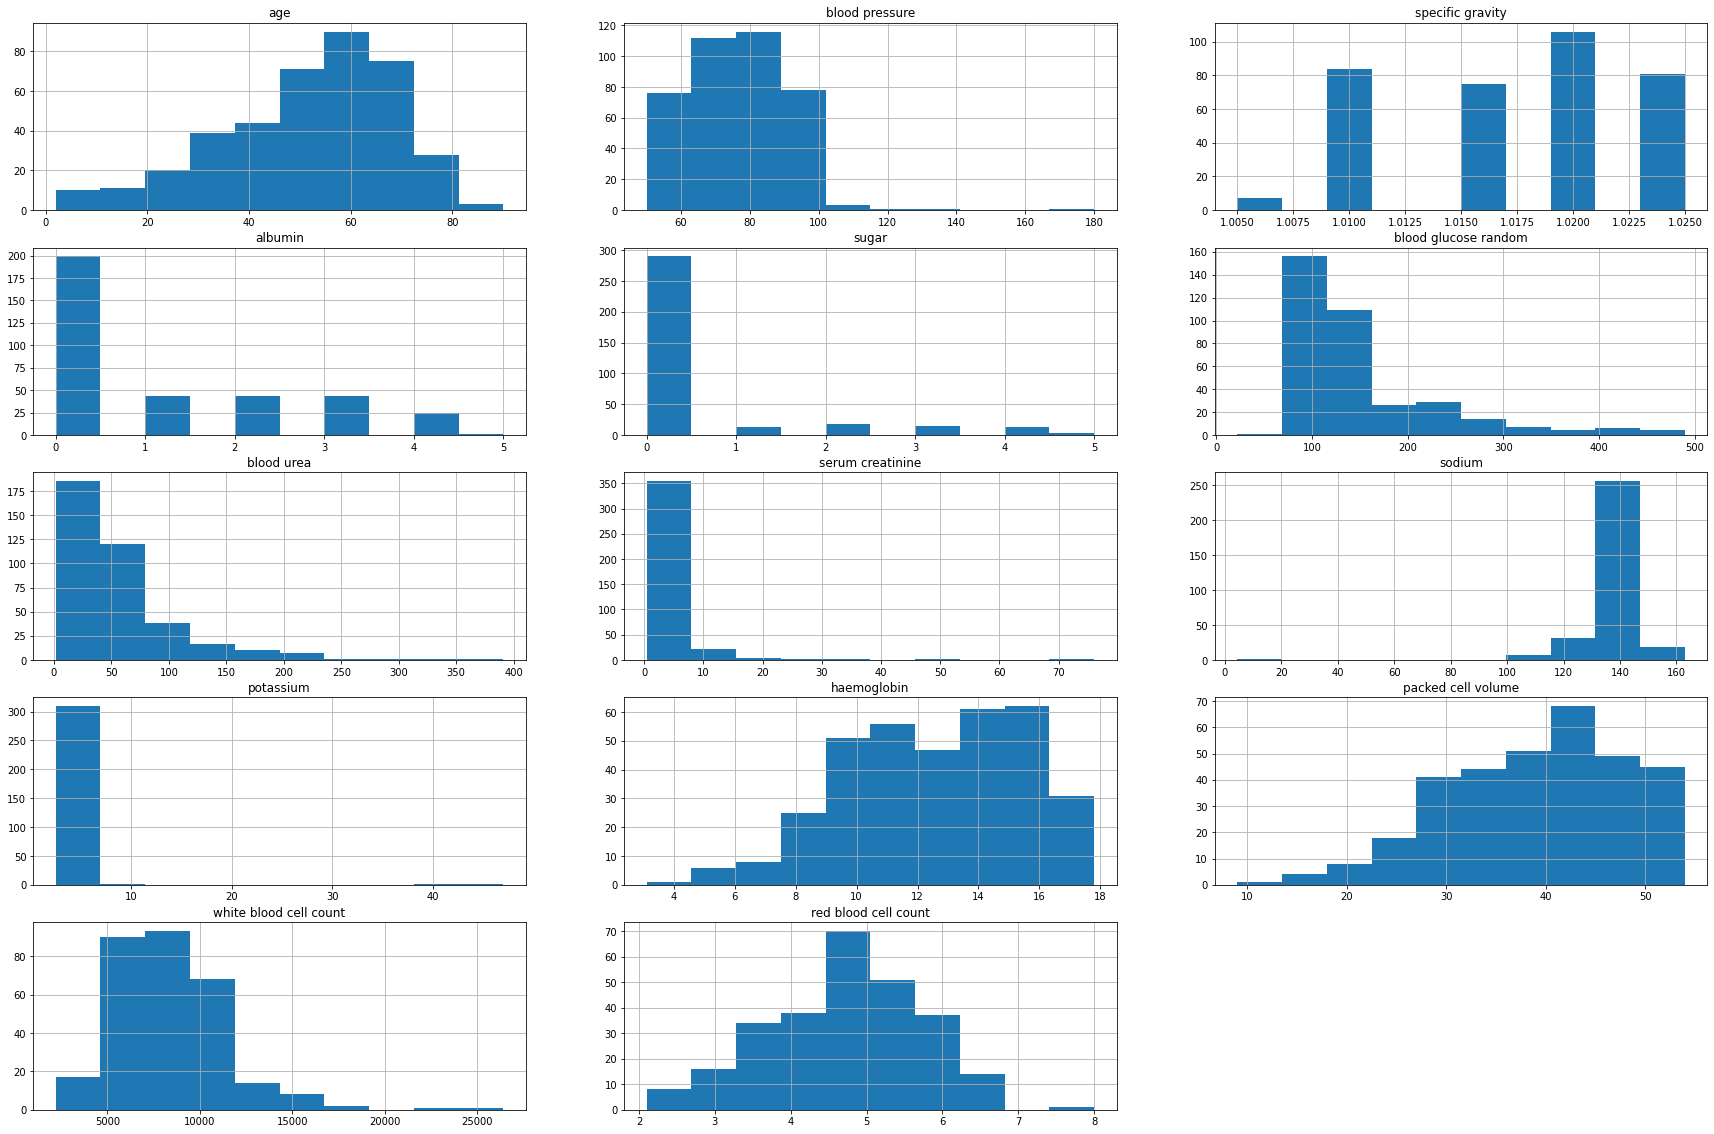

In [416]:
#Distribution of each numerical column 
plt.figure(figsize=(30,20))
for i,feature in enumerate(num_col):
    plt.subplot(5,3,i+1)
    df[feature].hist()
    plt.title(feature)

Observations:
    1.age looks a bit left skewed
    2.Blood gluscose random is right skewed
    3.Blood Urea is also a bit right skewed
    4.Rest of the features are lightly skewed

Now, let's check the label distribution for categorical data

In [417]:
len(cat_col)

11

In [418]:
import warnings
warnings.filterwarnings('ignore')

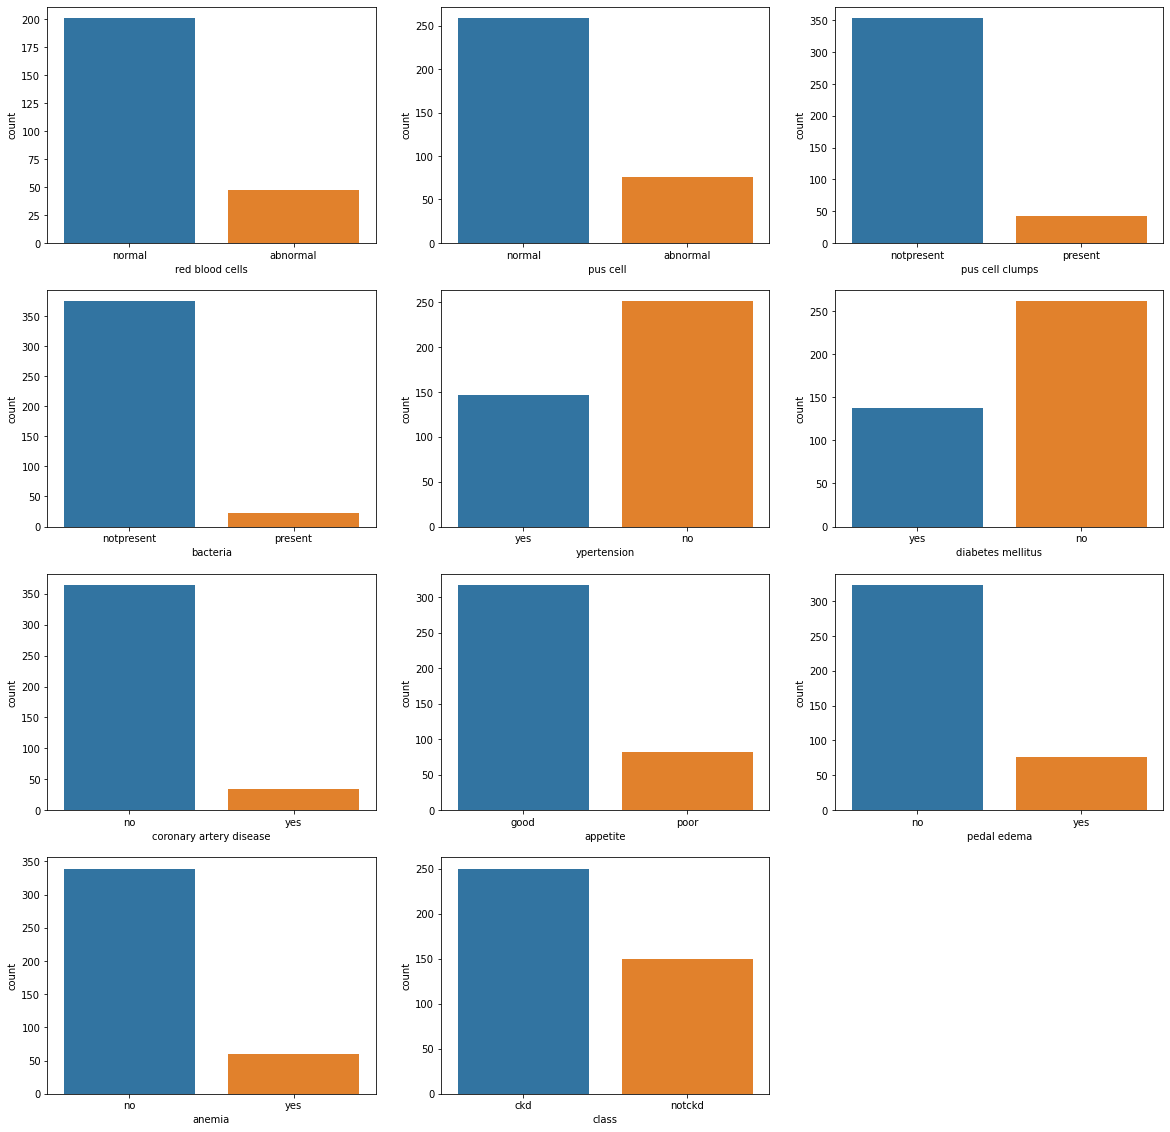

In [419]:
plt.figure(figsize=(20,20))
for i,feature in enumerate(cat_col):
    plt.subplot(4,3,i+1)
    sns.countplot(df[feature])

A few features have imbalanced categories. Stratified folds will be necessary while cross validation.

Text(0.5, 1.0, 'target Class')

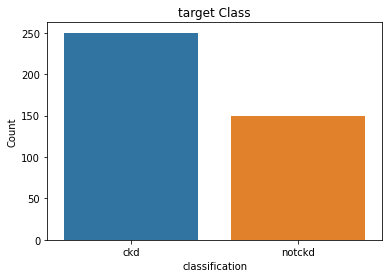

In [420]:
sns.countplot(x='class',data=df)
plt.xlabel("classification")
plt.ylabel("Count")
plt.title("target Class")

Correlations

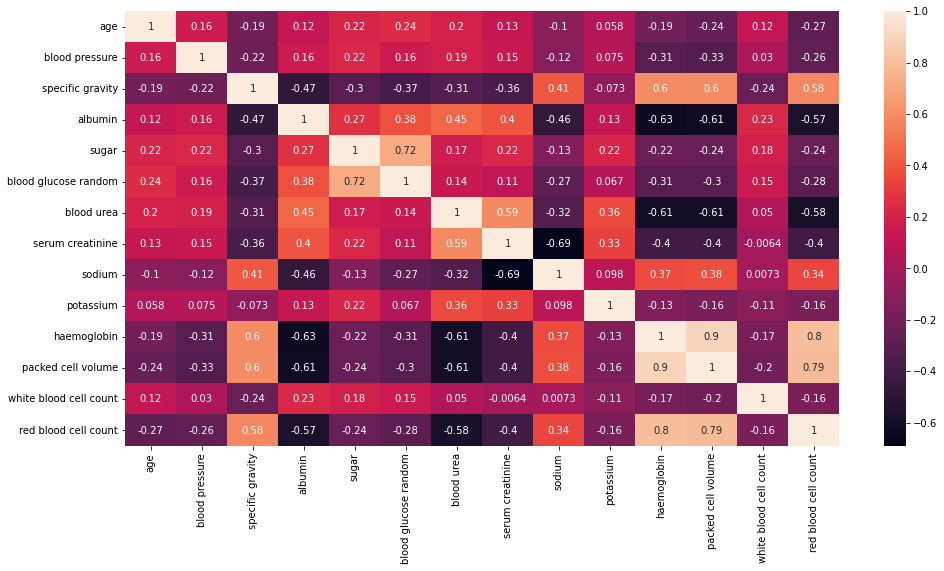

In [421]:
plt.figure(figsize=(16,8))
corr_df = df.corr()
sns.heatmap(corr_df,annot=True)

Positive Correlation:

Specific gravity -> Red blood cell count, Packed cell volume and Hemoglobin
Sugar -> Blood glucose random
Blood Urea -> Serum creatinine
Hemoglobin -> Red Blood cell count <- packed cell volume


Negative Correlation:
Albumin, Blood urea -> Red blood cell count, packed cell volume, Hemoglobin
Serum creatinine -> Sodium

In [422]:
df.groupby(['red blood cells','class'])['red blood cell count'].agg(['count','mean','median','min','max'])

count      mean  median  min  max
red blood cells class                                    
abnormal        ckd        25  3.832000     3.7  2.5  5.6
normal          ckd        40  3.782500     3.8  2.1  8.0
                notckd    134  5.368657     5.3  4.4  6.5

Let's check for Positive correlation and its impact on classes¶

In [423]:
import plotly.express as px

In [424]:
px.violin(df,y='red blood cell count',x="class", color="class")

In [425]:
px.scatter(df,'haemoglobin','packed cell volume')

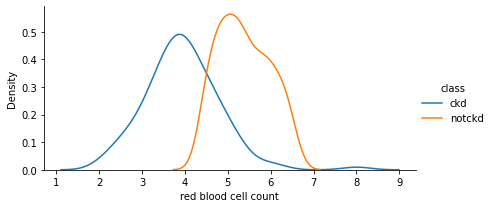

In [426]:
### analysing distribution of 'red_blood_cell_count' in both Labels 

grid=sns.FacetGrid(df, hue="class",aspect=2)
grid.map(sns.kdeplot, 'red blood cell count')
grid.add_legend()

Both distributions are quite different, distribution CKD is quite normal and evenly distributed but not CKD distribution is a little bit left-skewed but quite close to a normal distribution

In [427]:
# Defining violin and scatter plot & kde_plot functions
def violin(col):
    fig = px.violin(df, y=col, x="class", color="class", box=True)
    return fig.show()

def scatters(col1,col2):
    fig = px.scatter(df, x=col1, y=col2, color="class")
    return fig.show()

In [428]:
def kde_plot(feature):
    grid = sns.FacetGrid(df, hue="class",aspect=2)
    grid.map(sns.kdeplot, feature)
    grid.add_legend()

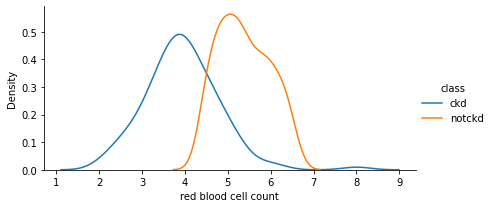

In [429]:
kde_plot('red blood cell count')

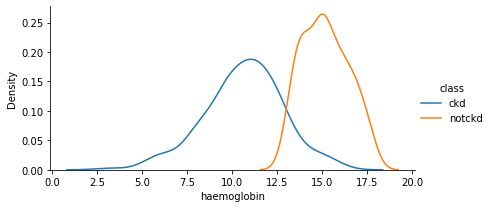

In [430]:
kde_plot('haemoglobin')

In [431]:
scatters('red blood cell count', 'packed cell volume')

In [432]:
scatters('red blood cell count', 'haemoglobin')

In [433]:
scatters('haemoglobin','packed cell volume')

1.RBC count range ~2 to <4.5 and Hemoglobin between 3 to <13 are mostly classified as positive for chronic kidney  
disease(i.e ckd).
2.RBC count range >4.5 to ~6.1 and Hemoglobin between >13 to 17.8 are classified as negative for chronic kidney 
disease(i.e nockd).

In [434]:
violin('red blood cell count')

In [435]:
violin('packed cell volume')

Now let's check for negative correlation and its impact on classes

Albumin, Blood urea -> Red blood cell count, packed cell volume, Haemoglobin

In [436]:
scatters('red blood cell count','albumin')

Clearly, albumin levels of above 0 affect ckd largely

In [437]:
scatters('packed cell volume','blood urea')

Packed cell volume >= 40 largely affects to be non ckd

In [438]:
fig = px.bar(df, x="specific gravity", y="packed cell volume",
             color='class', barmode='group',
             height=400)
fig.show()

Clearly, specific gravity >=1.02 affects non ckd

In [439]:
df.head()

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [440]:
df.isna().sum().sort_values(ascending=False)

red blood cells            152
red blood cell count       131
white blood cell count     106
potassium                   88
sodium                      87
packed cell volume          71
 pus cell                   65
haemoglobin                 52
sugar                       49
specific gravity            47
albumin                     46
blood glucose random        44
blood urea                  19
serum creatinine            17
blood pressure              12
age                          9
bacteria                     4
pus cell clumps              4
ypertension                  2
diabetes mellitus            2
coronary artery disease      2
appetite                     1
pedal edema                  1
anemia                       1
class                        0
dtype: int64

In [441]:
cat_col

['red blood cells',
 ' pus cell',
 'pus cell clumps',
 'bacteria',
 'ypertension',
 'diabetes mellitus',
 'coronary artery disease',
 'appetite',
 'pedal edema',
 'anemia',
 'class']

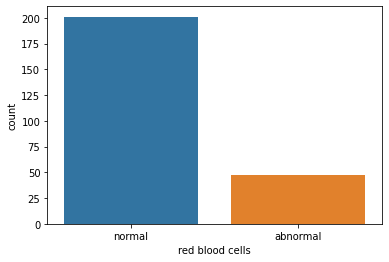

In [442]:
sns.countplot(df['red blood cells'])

In [443]:
data=df.copy()

### filling missing with Random value

Random Value Imputation

In [444]:
data['red blood cells'].isnull().sum()

152

In [445]:
data['red blood cells'].dropna().sample()

153    abnormal
Name: red blood cells, dtype: object

In [446]:
random_sample=data['red blood cells'].dropna().sample(data['red blood cells'].isnull().sum())
random_sample

386    normal
272    normal
267    normal
383    normal
342    normal
        ...  
385    normal
348    normal
296    normal
278    normal
321    normal
Name: red blood cells, Length: 152, dtype: object

In [447]:
random_sample.index

Int64Index([386, 272, 267, 383, 342,  38,  71, 333, 380,  87,
            ...
            274, 399, 308, 130, 116, 385, 348, 296, 278, 321],
           dtype='int64', length=152)

In [448]:
data[data['red blood cells'].isnull()].index

Int64Index([  0,   1,   5,   6,  10,  12,  13,  15,  16,  17,
            ...
            245, 268, 280, 290, 295, 309, 322, 349, 350, 381],
           dtype='int64', length=152)

In [449]:
random_sample.index=data[data['red blood cells'].isnull()].index

In [450]:
random_sample.index

Int64Index([  0,   1,   5,   6,  10,  12,  13,  15,  16,  17,
            ...
            245, 268, 280, 290, 295, 309, 322, 349, 350, 381],
           dtype='int64', length=152)

In [451]:
random_sample

0      normal
1      normal
5      normal
6      normal
10     normal
        ...  
309    normal
322    normal
349    normal
350    normal
381    normal
Name: red blood cells, Length: 152, dtype: object

In [452]:
data.loc[data['red blood cells'].isnull(),'red blood cells']=random_sample

In [453]:
data.head()

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


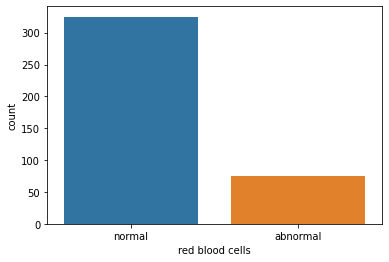

In [454]:
sns.countplot(data['red blood cells'])

In [455]:
data['red blood cells'].value_counts()/len(data)

normal      0.8125
abnormal    0.1875
Name: red blood cells, dtype: float64

In [456]:
len(df[df['red blood cells']=='normal'])/248

0.8104838709677419

In [457]:
len(df[df['red blood cells']=='abnormal'])/248

0.18951612903225806

In [458]:
### lets create a function so that I can easily do it for all features
def Random_value_imputation(feature):
    random_sample=data[feature].dropna().sample(data[feature].isnull().sum())               
    random_sample.index=data[data[feature].isnull()].index
    data.loc[data[feature].isnull(),feature]=random_sample

In [459]:
Random_value_imputation(' pus cell')
Random_value_imputation('red blood cells')

In [460]:
data[cat_col].isnull().sum()

red blood cells            0
 pus cell                  0
pus cell clumps            4
bacteria                   4
ypertension                2
diabetes mellitus          2
coronary artery disease    2
appetite                   1
pedal edema                1
anemia                     1
class                      0
dtype: int64

In [461]:
### as rest of the features has less missing values,so I can fill it using mode concept

In [462]:
mode=data['pus cell clumps'].mode()[0]
mode

'notpresent'

In [463]:
data['pus cell clumps']=data['pus cell clumps'].fillna(mode)

In [464]:
def impute_mode(feature):
    mode=data[feature].mode()[0]
    data[feature]=data[feature].fillna(mode)

In [465]:
for col in cat_col:
    impute_mode(col)

In [466]:
data[cat_col].isnull().sum()

red blood cells            0
 pus cell                  0
pus cell clumps            0
bacteria                   0
ypertension                0
diabetes mellitus          0
coronary artery disease    0
appetite                   0
pedal edema                0
anemia                     0
class                      0
dtype: int64

In [467]:
data[num_col].isnull().sum()

age                         9
blood pressure             12
specific gravity           47
albumin                    46
sugar                      49
blood glucose random       44
blood urea                 19
serum creatinine           17
sodium                     87
potassium                  88
haemoglobin                52
packed cell volume         71
white blood cell count    106
red blood cell count      131
dtype: int64

In [468]:
### lets fill missing values in Numerical features using Random value Imputation

In [469]:
for col in num_col:
    Random_value_imputation(col)

In [470]:
data[num_col].isnull().sum()

age                       0
blood pressure            0
specific gravity          0
albumin                   0
sugar                     0
blood glucose random      0
blood urea                0
serum creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed cell volume        0
white blood cell count    0
red blood cell count      0
dtype: int64

feature Encoding

In [471]:
for col in cat_col:
    print('{} has {} categories'.format(col, data[col].nunique()))

red blood cells has 2 categories
 pus cell has 2 categories
pus cell clumps has 2 categories
bacteria has 2 categories
ypertension has 2 categories
diabetes mellitus has 2 categories
coronary artery disease has 2 categories
appetite has 2 categories
pedal edema has 2 categories
anemia has 2 categories
class has 2 categories


In [472]:
#### as we have just 2 categories in each feature then we can consider Label Encoder as it will not cause Curse of Dimensionality

In [473]:
from sklearn.preprocessing import LabelEncoder

In [474]:
le = LabelEncoder()

In [475]:
for col in cat_col:
    data[col]=le.fit_transform(data[col])

In [476]:
data.head()

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,172.0,...,38.0,6000.0,3.8,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,5.5,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,0,0,0,0


Feature Importance

In [477]:
#SelectKBest-to select k best features

In [478]:
#chi2-Internally this class is going to check that whether p-value is less than 0.05 or not
#based on that,it will actually order all the features

In [479]:
from sklearn.feature_selection import SelectKBest#Also known as Information Gain
from sklearn.feature_selection import chi2

In [480]:
ind_col=[col for col in data.columns if col!='class']
dep_col='class'

In [481]:
X=data[ind_col]
y=data[dep_col]

In [482]:
ordered_rank_features=SelectKBest(score_func=chi2,k=20)
ordered_feature=ordered_rank_features.fit(X,y)

In [483]:
ordered_feature

SelectKBest(k=20, score_func=<function chi2 at 0x7fa338c98830>)

In [484]:
#To get scores(rank) of feature,what we can do we can use scores function
ordered_feature.scores_

array([1.08352902e+02, 7.89035489e+01, 5.69397235e-03, 2.33494815e+02,
       1.12200000e+02, 9.65928205e+00, 1.47621505e+01, 2.52000000e+01,
       1.32000000e+01, 2.36367918e+03, 2.36570937e+03, 3.55742383e+02,
       3.64401215e+01, 3.07261289e+00, 1.28519073e+02, 3.60130773e+02,
       1.25531774e+04, 1.78979988e+01, 8.82000000e+01, 8.22000000e+01,
       2.04000000e+01, 4.92000000e+01, 4.56000000e+01, 3.60000000e+01])

In [485]:
datascores=pd.DataFrame(ordered_feature.scores_,columns=["Score"])
datascores

,Score
0,108.352902
1,78.903549
2,0.005694
3,233.494815
4,112.200000
5,9.659282
6,14.762151
7,25.200000
8,13.200000
9,2363.679182


In [486]:
dfcolumns=pd.DataFrame(X.columns)
dfcolumns

,0
0,age
1,blood pressure
2,specific gravity
3,albumin
4,sugar
5,red blood cells
6,pus cell
7,pus cell clumps
8,bacteria
9,blood glucose random


In [487]:
features_rank=pd.concat([dfcolumns,datascores],axis=1)

In [488]:
features_rank

,0,Score
0,age,108.352902
1,blood pressure,78.903549
2,specific gravity,0.005694
3,albumin,233.494815
4,sugar,112.200000
5,red blood cells,9.659282
6,pus cell,14.762151
7,pus cell clumps,25.200000
8,bacteria,13.200000
9,blood glucose random,2363.679182


In [489]:
#Higher the score is,more important feature is 

In [490]:
features_rank.columns=['Features','Score']
features_rank

,Features,Score
0,age,108.352902
1,blood pressure,78.903549
2,specific gravity,0.005694
3,albumin,233.494815
4,sugar,112.200000
5,red blood cells,9.659282
6,pus cell,14.762151
7,pus cell clumps,25.200000
8,bacteria,13.200000
9,blood glucose random,2363.679182


In [491]:
#fetch largest 10 values of Score column
features_rank.nlargest(10,'Score')

,Features,Score
16,white blood cell count,12553.177420
10,blood urea,2365.709366
9,blood glucose random,2363.679182
15,packed cell volume,360.130773
11,serum creatinine,355.742383
3,albumin,233.494815
14,haemoglobin,128.519073
4,sugar,112.200000
0,age,108.352902
18,ypertension,88.200000


In [492]:
selected_columns=features_rank.nlargest(10,'Score')['Features'].values

In [493]:
X_new=data[selected_columns]

### Model Building

In [494]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new,y,train_size=0.75)

In [495]:
print(X_train.shape)
print(X_test.shape)

(300, 10)
(100, 10)


In [496]:
## check whether dataset is imbalance or not
y_train.value_counts()

0    192
1    108
Name: class, dtype: int64

In [497]:
### Lets find best model using Hyperparameter optimization

In [498]:
from xgboost import XGBClassifier
XGBClassifier()

XGBClassifier()

In [499]:
## Hyper Parameter Optimization with respect to XGBoost

params={
 "learning_rate"    : [0.05, 0.20, 0.25 ] ,
 "max_depth"        : [ 5, 8, 10, 12],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.7 ]
    
}

In [500]:
from sklearn.model_selection import RandomizedSearchCV

In [501]:
from xgboost import XGBClassifier
classifier=XGBClassifier()

In [502]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [503]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=XGBClassifier(), n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.4],
                                        'learning_rate': [0.05, 0.2, 0.25],
                                        'max_depth': [5, 8, 10, 12],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [504]:
random_search.best_estimator_

XGBClassifier(colsample_bytree=0.4, gamma=0.2, learning_rate=0.2, max_depth=12,
              min_child_weight=3)

In [505]:
random_search.best_params_

{'colsample_bytree': 0.4,
 'gamma': 0.2,
 'learning_rate': 0.2,
 'max_depth': 12,
 'min_child_weight': 3}

In [506]:
classifier=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.0, gpu_id=0,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=5,
              min_child_weight=1, 
              n_estimators=100, n_jobs=2, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=3)

## we have got this model on the basis of cross valudation & hyper-parameter optimization

In [507]:
classifier.fit(X_train,y_train)

[10:48:03] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=5
[10:48:03] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=5
[10:48:03] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=5
[10:48:03] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=5
[10:48:03] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=5
[10:48:03] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=4
[10:48:03] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=5
[10:48:03] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nod

XGBClassifier(colsample_bytree=0.4, gamma=0.0, gpu_id=0,
              interaction_constraints='', learning_rate=0.25, max_depth=5,
              n_jobs=2, num_parallel_tree=1, tree_method='exact',
              use_label_encoder=True, validate_parameters=1, verbosity=3)

In [508]:
y_pred=classifier.predict(X_test)

In [509]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [510]:
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)

Confusion Matrix:
[[56  2]
 [ 2 40]]


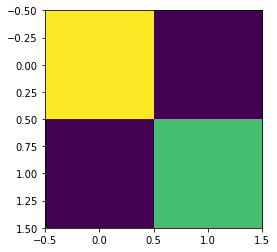

In [511]:
### to make confusion matrix user-friendly
plt.imshow(confusion)

In [512]:
accuracy_score(y_test, y_pred)

0.96